# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**


----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Acá deberían leer el conjunto de datos que ya tienen.
#melb_df = pd.read_csv(
#    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
#melb_df[:3]

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


#### Ejercicio 1.1 con OneHotEncoder

In [15]:
melb_df=merged_sales_df1
categorical_cols=['CouncilArea','Suburb','Type']

print(melb_df[categorical_cols].nunique())
num_of_cols_cat=len(categorical_cols)
print(num_of_cols_cat,'number of categorical fields/columns')
num_of_cols=melb_df.shape[1]
print(num_of_cols,'number of fields/columns in the DataFrame')
num_of_new_cols=melb_df[categorical_cols].nunique().sum()
print(num_of_new_cols,'the number of new fields/columns')

# Check for nulls
melb_df[categorical_cols].isna().sum()
melb_df.loc[:,['CouncilArea','Suburb','Type']].dropna()

melb_df.CouncilArea.unique()
melb_df= melb_df.dropna(subset=['CouncilArea'])

CouncilArea     28
Suburb         267
Type             3
dtype: int64
3 number of categorical fields/columns
19 number of fields/columns in the DataFrame
298 the number of new fields/columns


In [16]:
melb_df[categorical_cols]


,CouncilArea,Suburb,Type
0,Yarra,Abbotsford,h
1,Yarra,Abbotsford,h
2,Yarra,Abbotsford,h
3,Yarra,Abbotsford,h
4,Yarra,Abbotsford,h
...,...,...,...
6126,Maribyrnong,Maidstone,t
6127,Maribyrnong,Maidstone,t
6128,Moreland,Oak Park,t
6129,Darebin,Reservoir,t


<Axes: >

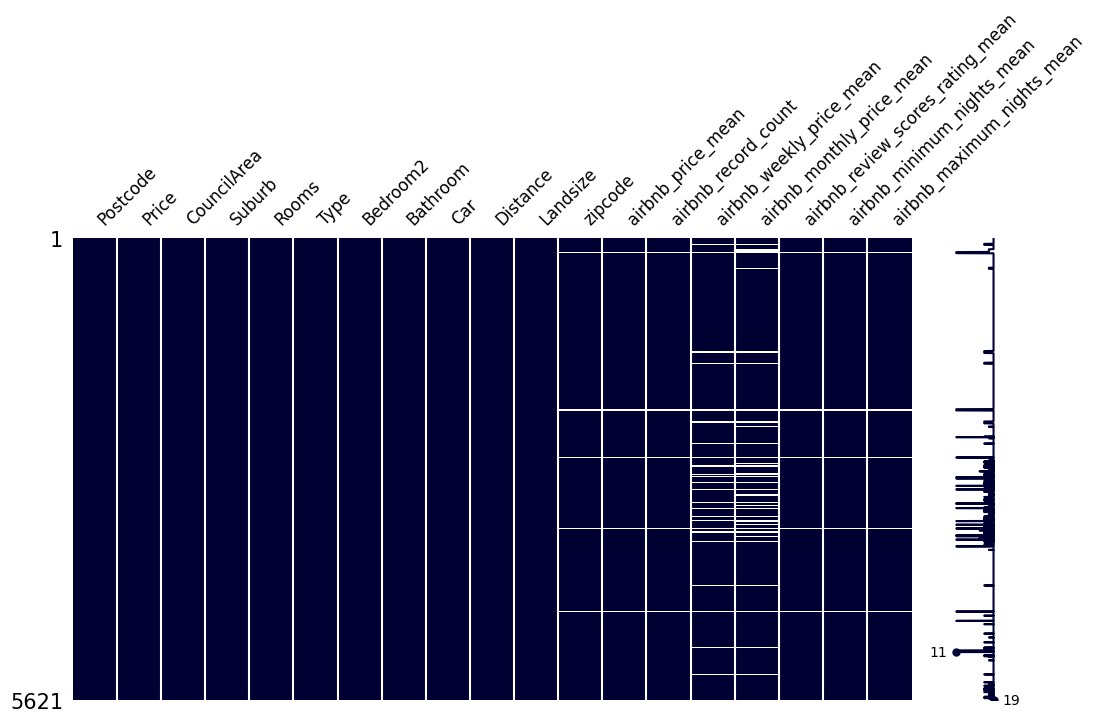

In [17]:
msno.matrix(melb_df,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

In [18]:
melb_df.CouncilArea.unique()
melb_df= melb_df.dropna(subset=['CouncilArea'])

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(melb_df[categorical_cols])
# We can inspect the categories found by the encoder 
#encoder.categories_
print(len(encoder.categories_[0]),len(encoder.categories_[1]),len(encoder.categories_[2]))


28 253 3


In [20]:
encoded_types = encoder.transform(melb_df.loc[:,['CouncilArea','Suburb','Type']])

In [21]:
encoder_categories=np.concatenate((encoder.categories_[0],encoder.categories_[1],encoder.categories_[2]))
melb_df_encoder=pd.DataFrame(encoded_types, columns=encoder_categories)

In [22]:
melb_df_encoder

,Banyule,Bayside,Boroondara,Brimbank,Casey,Darebin,Glen Eira,Greater Dandenong,Hobsons Bay,Hume,...,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5617,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5619,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


prepare the dataframes to do the merge

In [23]:
melb_df=melb_df.reset_index()
melb_df=melb_df.reset_index()

In [24]:
melb_df.rename(columns={'index': 'original_index'}, inplace=True)
melb_df.rename(columns={'level_0': 'index'}, inplace=True)

In [25]:
melb_df

,index,original_index,Postcode,Price,CouncilArea,Suburb,Rooms,Type,Bedroom2,Bathroom,...,Distance,Landsize,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean,airbnb_review_scores_rating_mean,airbnb_minimum_nights_mean,airbnb_maximum_nights_mean
0,0,0,3067.0,1035000.0,Yarra,Abbotsford,2,h,2.0,1.0,...,2.5,156.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
1,1,1,3067.0,1465000.0,Yarra,Abbotsford,3,h,3.0,2.0,...,2.5,134.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
2,2,2,3067.0,1600000.0,Yarra,Abbotsford,4,h,3.0,1.0,...,2.5,120.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
3,3,3,3067.0,1876000.0,Yarra,Abbotsford,3,h,4.0,2.0,...,2.5,245.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
4,4,4,3067.0,1636000.0,Yarra,Abbotsford,2,h,2.0,1.0,...,2.5,256.0,3067.0,130.624031,258.0,605.152174,2187.032258,95.288462,4.093023,745.151163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,5616,6126,3012.0,670000.0,Maribyrnong,Maidstone,3,t,3.0,2.0,...,6.4,159.0,3012.0,112.631579,76.0,518.000000,2335.000000,94.000000,4.026316,742.618421
5617,5617,6127,3012.0,821000.0,Maribyrnong,Maidstone,4,t,4.0,3.0,...,6.4,294.0,3012.0,112.631579,76.0,518.000000,2335.000000,94.000000,4.026316,742.618421
5618,5618,6128,3046.0,545000.0,Moreland,Oak Park,2,t,2.0,1.0,...,11.2,0.0,3046.0,69.033333,60.0,351.000000,1076.666667,94.916667,11.366667,586.316667
5619,5619,6129,3073.0,672000.0,Darebin,Reservoir,2,t,2.0,1.0,...,12.0,243.0,3073.0,273.926471,68.0,399.888889,1459.625000,92.574468,8.588235,483.588235


In [26]:
melb_df_encoder=melb_df_encoder.reset_index()

In [27]:
melb_df_merge=pd.merge(melb_df,melb_df_encoder,how='inner', on='index')
melb_df_merge = melb_df_merge.drop(columns=['CouncilArea','Suburb','Type','index'])

In [28]:
melb_df_merge #We keep the original index to facilitate the next merges.

,original_index,Postcode,Price,Rooms,Bedroom2,Bathroom,Car,Distance,Landsize,zipcode,...,Williamstown,Williamstown North,Windsor,Wollert,Wyndham Vale,Yallambie,Yarraville,h,t,u
0,0,3067.0,1035000.0,2,2.0,1.0,0.0,2.5,156.0,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,3067.0,1465000.0,3,3.0,2.0,0.0,2.5,134.0,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,3067.0,1600000.0,4,3.0,1.0,2.0,2.5,120.0,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,3067.0,1876000.0,3,4.0,2.0,0.0,2.5,245.0,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,3067.0,1636000.0,2,2.0,1.0,2.0,2.5,256.0,3067.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,6126,3012.0,670000.0,3,3.0,2.0,2.0,6.4,159.0,3012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5617,6127,3012.0,821000.0,4,4.0,3.0,2.0,6.4,294.0,3012.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5618,6128,3046.0,545000.0,2,2.0,1.0,1.0,11.2,0.0,3046.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5619,6129,3073.0,672000.0,2,2.0,1.0,1.0,12.0,243.0,3073.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [420]:
merged_sales_df2=merged_sales_df[['BuildingArea', 'YearBuilt']].reset_index()

melb_df_merge.rename(columns={'original_index':'index'}, inplace=True)



melb_df_merge=pd.merge(melb_df_merge,merged_sales_df2,how='inner', on='index')
melb_df_merge= melb_df_merge.drop(['index'] , axis=1)
melb_df_BAYB=melb_df_merge

In [398]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = merged_sales_df.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

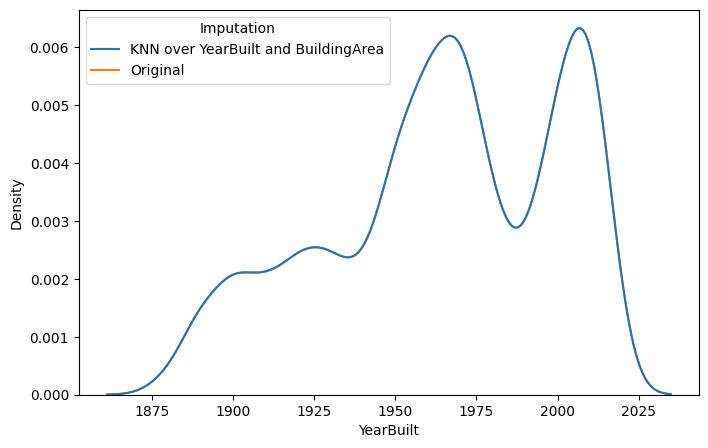

In [399]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt and BuildingArea'
melb_year_build = merged_sales_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pd.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='YearBuilt', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

In [449]:
melb_df=melb_df_BAYB


In [436]:
melb_df=melb_df.dropna() #esto con KNN creo que se va

In [437]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#scaler = StandardScaler() 
#melb_df_scaler = scaler.fit_transform(melb_df)


pca = PCA(n_components=20)
pca_dummy_features = pca.fit_transform(melb_df)
melb_df_pca = np.hstack([melb_df, pca_dummy_features])


In [438]:
print(
    "Explained variand ratio (PCA firs 20 components) : %s"
    % str(pca.explained_variance_ratio_) 
)

Explained variand ratio (PCA firs 20 components) : [9.99977505e-01 1.56507415e-05 6.06365899e-06 5.55533540e-07
 1.50179208e-07 4.08459370e-08 1.69267654e-08 7.70927759e-09
 6.68311673e-09 2.72650141e-09 2.73500707e-11 2.50908212e-11
 8.21831144e-12 1.91714092e-12 1.37540197e-12 5.95868789e-13
 4.58965604e-13 3.49107323e-13 3.09260034e-13 2.73353197e-13]


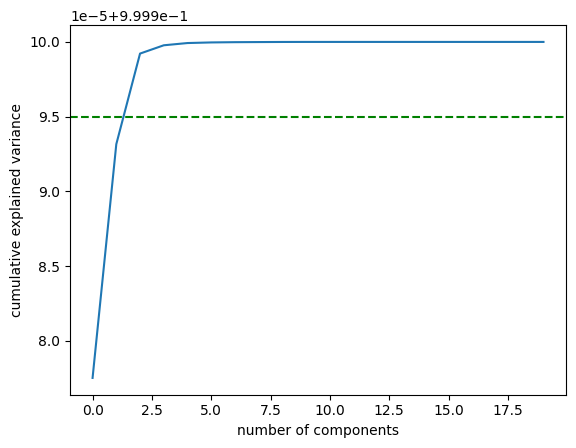

In [439]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.999995,color='g',linestyle='--')

In [452]:
new_columns=['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 
                    'pca10', 'pca11', 'pca12', 'pca13', 'pca14', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20'
                   ]
processed_melb_df = pd.DataFrame(data=pca_dummy_features , columns=new_columns)
processed_melb_df.shape

(5156, 20)

In [446]:
pca.explained_variance_ratio_[0:3].sum()


0.9999992193253303

Tomamos las primeras 3 componenetes princilapes que representan casi un 100% de la informacion de la muestra

In [453]:
melb_df_pca3=processed_melb_df[['pca1', 'pca2', 'pca3']]

In [454]:
melb_df_pca3

,pca1,pca2,pca3
0,-24021.946327,-250.174311,-388.906719
1,405977.986153,-165.044465,-603.642579
2,540977.959090,-138.215175,-670.622472
3,816977.939552,-83.945872,-813.146001
4,576977.972633,-131.385891,-692.667479
...,...,...,...
5151,-389021.816346,-334.852561,-91.550734
5152,-238021.819876,-305.263557,-171.610782
5153,-514022.413860,-577.996572,-1276.370883
5154,-387022.178792,-635.947942,-954.540648


In [455]:
melb_df_pca3=melb_df_pca.reset_index()
melb_df=melb_df.reset_index()

melb_df_merge=pd.merge(melb_df,melb_df_pca3,how='inner', on='index')
melb_df_merge= melb_df_merge.drop(['index'] , axis=1)


In [456]:
melb_df_merge #el problema de los indices se soluciona haciendo KNN en las variables que tienen nan 

,Postcode,Price,Rooms,Bedroom2,Bathroom,Car,Distance,Landsize,zipcode,airbnb_price_mean,...,Yarraville,h,t,u,BuildingArea,YearBuilt,level_0,pca1,pca2,pca3
0,3067.0,1035000.0,2,2.0,1.0,0.0,2.5,156.0,3067.0,130.624031,...,0.0,1.0,0.0,0.0,79.0,1900.0,0,-24021.946327,-250.174311,-388.906719
1,3067.0,1465000.0,3,3.0,2.0,0.0,2.5,134.0,3067.0,130.624031,...,0.0,1.0,0.0,0.0,150.0,1900.0,1,405977.986153,-165.044465,-603.642579
2,3067.0,1600000.0,4,3.0,1.0,2.0,2.5,120.0,3067.0,130.624031,...,0.0,1.0,0.0,0.0,142.0,2014.0,2,540977.959090,-138.215175,-670.622472
3,3067.0,1876000.0,3,4.0,2.0,0.0,2.5,245.0,3067.0,130.624031,...,0.0,1.0,0.0,0.0,210.0,1910.0,3,816977.939552,-83.945872,-813.146001
4,3067.0,1636000.0,2,2.0,1.0,2.0,2.5,256.0,3067.0,130.624031,...,0.0,1.0,0.0,0.0,107.0,1890.0,4,576977.972633,-131.385891,-692.667479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5151,3056.0,955000.0,3,3.0,2.0,2.0,5.2,327.0,3056.0,94.672646,...,0.0,0.0,1.0,0.0,110.0,2007.0,5151,-389021.816346,-334.852561,-91.550734
5152,3056.0,685000.0,2,2.0,2.0,1.0,5.2,0.0,3056.0,94.672646,...,0.0,0.0,1.0,0.0,100.0,2002.0,5152,-238021.819876,-305.263557,-171.610782
5153,3056.0,641000.0,3,3.0,2.0,1.0,5.2,0.0,3056.0,94.672646,...,0.0,0.0,1.0,0.0,112.0,1900.0,5153,-514022.413860,-577.996572,-1276.370883
5154,3056.0,641000.0,3,3.0,2.0,1.0,5.2,0.0,3056.0,94.672646,...,0.0,0.0,1.0,0.0,112.0,1900.0,5154,-387022.178792,-635.947942,-954.540648


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
